In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Mass modeling (deflector)

In [2]:
filename = 'modeling_lens_mass.csv'
data = pd.read_csv(filename)
modeling_param = ['einstein_radius_effective', 'centre_0', 'centre_1', 'ell_comps_0', 'ell_comps_1',
               'einstein_radius', 'shear_gamma_1', 'shear_gamma_2']
print('Number strong lensing candidates with modeling results: ', len(data))
print(data.columns)

data.head()

Number strong lensing candidates with modeling results:  335
Index(['Unnamed: 0', 'id_str', 'einstein_radius_effective_max_lh',
       'einstein_radius_effective_median_pdf',
       'einstein_radius_effective_lower_1_sigma',
       'einstein_radius_effective_upper_1_sigma',
       'einstein_radius_effective_lower_3_sigma',
       'einstein_radius_effective_upper_3_sigma', 'centre_0_max_lh',
       'centre_0_median_pdf', 'centre_0_lower_3_sigma',
       'centre_0_upper_3_sigma', 'centre_0_lower_1_sigma',
       'centre_0_upper_1_sigma', 'centre_1_max_lh', 'centre_1_median_pdf',
       'centre_1_lower_3_sigma', 'centre_1_upper_3_sigma',
       'centre_1_lower_1_sigma', 'centre_1_upper_1_sigma',
       'ell_comps_0_max_lh', 'ell_comps_0_median_pdf',
       'ell_comps_0_lower_3_sigma', 'ell_comps_0_upper_3_sigma',
       'ell_comps_0_lower_1_sigma', 'ell_comps_0_upper_1_sigma',
       'ell_comps_1_max_lh', 'ell_comps_1_median_pdf',
       'ell_comps_1_lower_3_sigma', 'ell_comps_1_upper_3_s

,Unnamed: 0,id_str,einstein_radius_effective_max_lh,einstein_radius_effective_median_pdf,einstein_radius_effective_lower_1_sigma,einstein_radius_effective_upper_1_sigma,einstein_radius_effective_lower_3_sigma,einstein_radius_effective_upper_3_sigma,centre_0_max_lh,centre_0_median_pdf,...,shear_gamma_1_lower_3_sigma,shear_gamma_1_upper_3_sigma,shear_gamma_1_lower_1_sigma,shear_gamma_1_upper_1_sigma,shear_gamma_2_max_lh,shear_gamma_2_median_pdf,shear_gamma_2_lower_3_sigma,shear_gamma_2_upper_3_sigma,shear_gamma_2_lower_1_sigma,shear_gamma_2_upper_1_sigma
0,0,102018665_NEG570040238507752998,0.853124,0.820237,0.790856,0.851182,0.773844,0.859449,-0.096528,-0.080179,...,-0.215621,0.026464,-0.161777,-0.052136,-0.028271,0.007414,-0.090688,0.129944,-0.026798,0.061116
1,1,102018665_NEG576731213511114485,0.987852,0.988056,0.983574,0.994458,0.973808,1.001143,-0.053157,-0.049730,...,0.078293,0.179014,0.125748,0.148589,-0.059590,-0.062631,-0.103176,-0.019012,-0.072831,-0.051687
2,2,102018666_NEG579859279508531437,1.510350,1.514415,1.509662,1.518703,1.498638,1.534338,-0.033898,-0.054047,...,-0.099939,-0.034521,-0.078691,-0.062894,-0.002803,0.010481,-0.028563,0.054750,-0.000171,0.023489
3,3,102018667_NEG587746535508057234,0.888685,0.883230,0.870709,0.892765,0.870709,0.899503,0.106716,0.102090,...,-0.020033,0.030900,-0.007490,0.011127,-0.104615,-0.075370,-0.137553,-0.062196,-0.116377,-0.071797
4,4,102018668_NEG595646727509469177,0.453341,0.456494,0.450868,0.462993,0.446139,0.468314,0.133636,0.137100,...,0.011714,0.082651,0.028079,0.053614,0.086536,0.078113,0.023649,0.127736,0.062040,0.093941


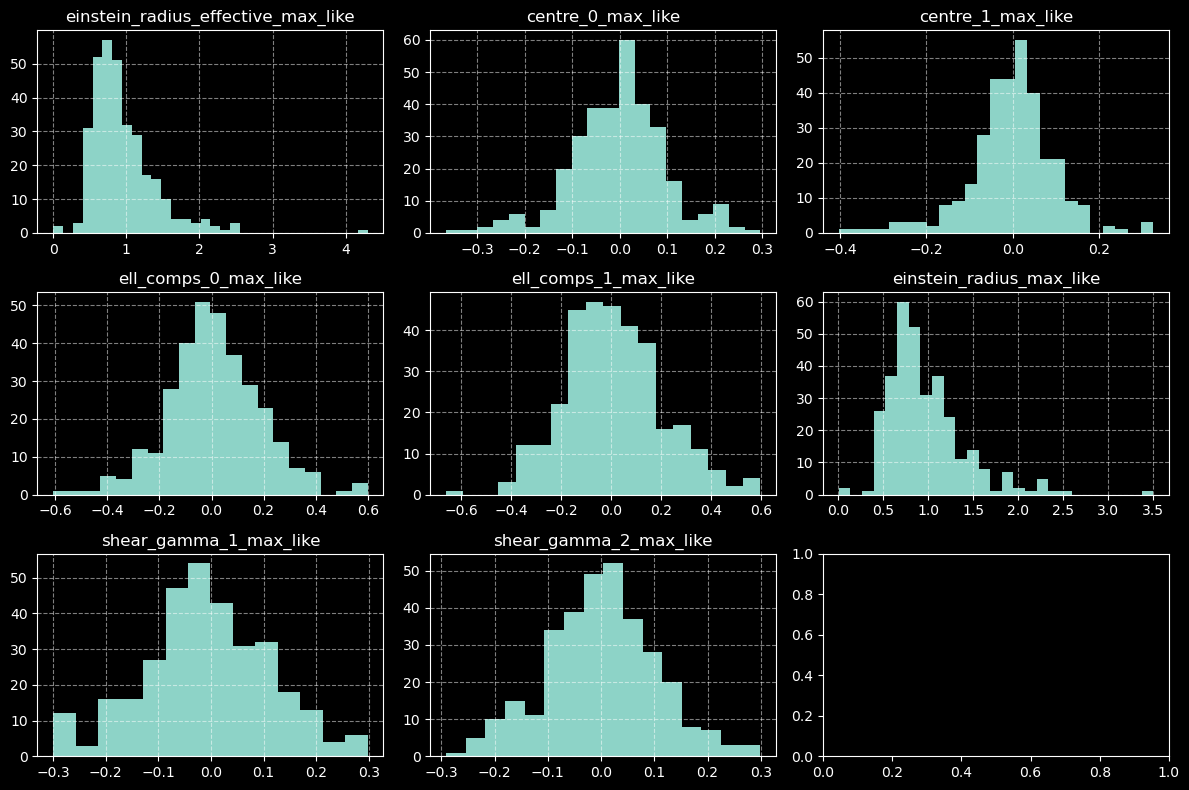

In [3]:
# Max likelihood for each parameter
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

for ax, (label) in zip(axes, modeling_param):
    ax.hist(data[label + '_max_lh'], bins='auto')
    ax.set_title(label + '_max_like')
    ax.grid(which='both',  linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
plt.close()

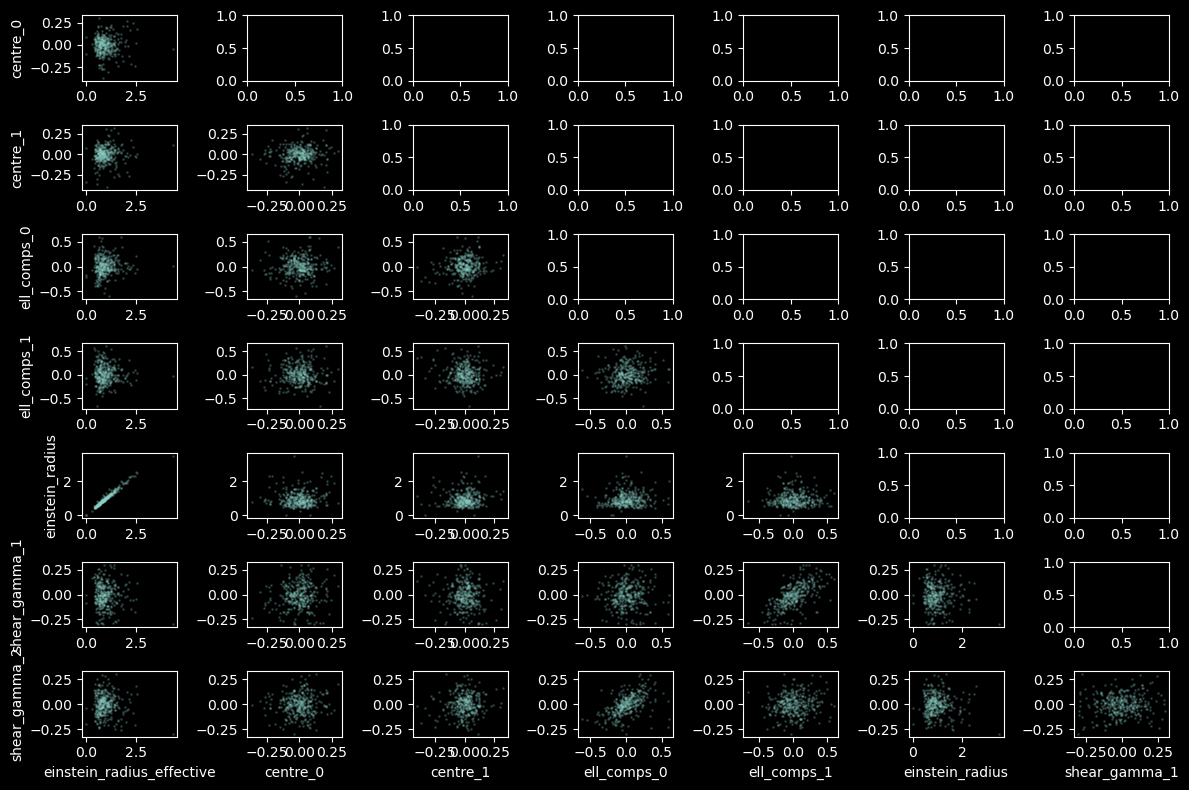

In [4]:
# Corner plots for Max likelihood parameters

fig, axes = plt.subplots(7, 7, figsize=(12, 8))

n = 0
for i in range(len(modeling_param)):
    for j in range(i+1, len(modeling_param)):
        ax = axes[j-1, i]
        ax.plot(data[modeling_param[i] + '_max_lh' ], data[modeling_param[j] + '_max_lh'], 'o', ms=1, alpha=0.2)
        if(i == 0):
            ax.set_ylabel(modeling_param[j])
        if(j == 7):
            ax.set_xlabel(modeling_param[i])
        n += 1

plt.tight_layout()
plt.show()
plt.close()

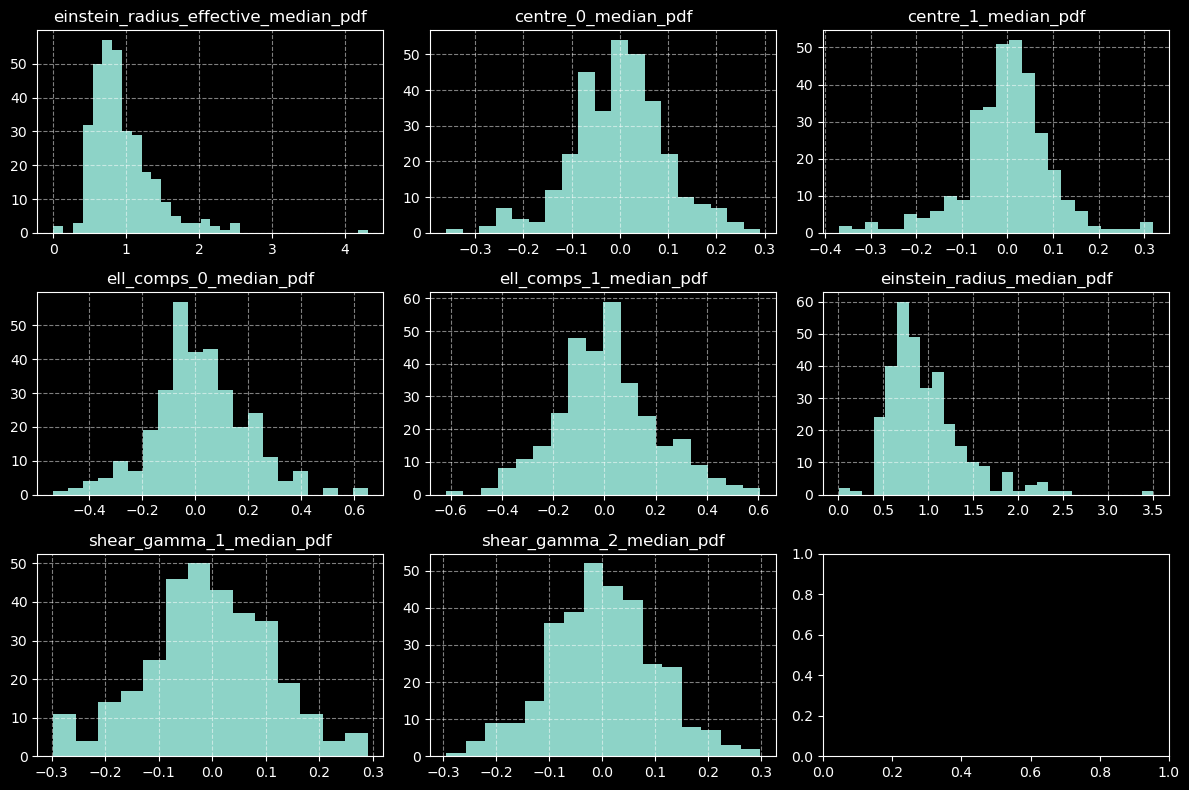

In [5]:
# Median of parameters (from posterior distribution)
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

for ax, (label) in zip(axes, modeling_param):
    ax.hist(data[label + '_median_pdf'], bins='auto')
    ax.set_title(label + '_median_pdf')
    ax.grid(which='both',  linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
plt.close()

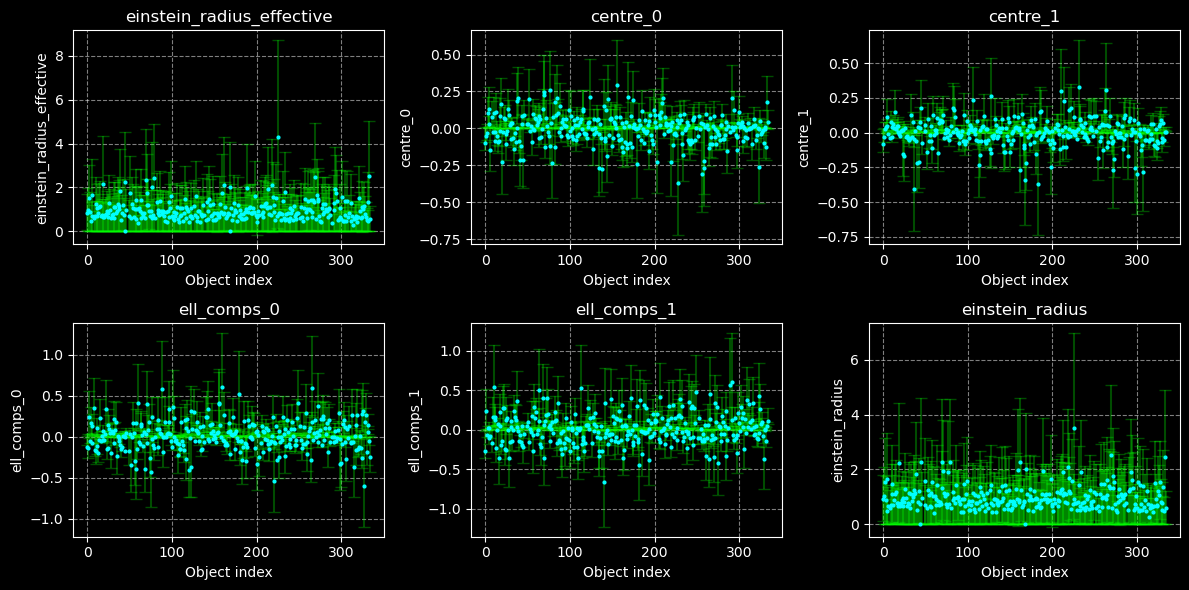

In [6]:
#Parameter distributions with 1 sigma errors

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for ax, label in zip(axes, modeling_param):
    
    main = '_max_lh'
    low = '_lower_1_sigma'
    upp = '_upper_1_sigma'

    y = data[label+main].to_numpy()
    yerr_low = data[label+low].to_numpy()
    yerr_up  = data[label+upp].to_numpy() 

    x = np.arange(len(data))

    #ax.errorbar(x, y, yerr=[yerr_low, yerr_up], fmt='o', capsize=4, ecolor='tab:red')
    line, caplines, barlinecols = ax.errorbar(x, y, yerr=[yerr_low, yerr_up], fmt='o', ms=2, capsize=4,
                                color = '#00FFFF', ecolor='#00FF00')
    for barcol in barlinecols: barcol.set_alpha(0.3)
    for cap in caplines: cap.set_alpha(0.3)
    
    ax.set_title(label)
    ax.set_xlabel("Object index")
    ax.set_ylabel(label)
    ax.grid(which='both',  linestyle='--', alpha=0.5)
    
plt.tight_layout()
plt.show() 
plt.close()

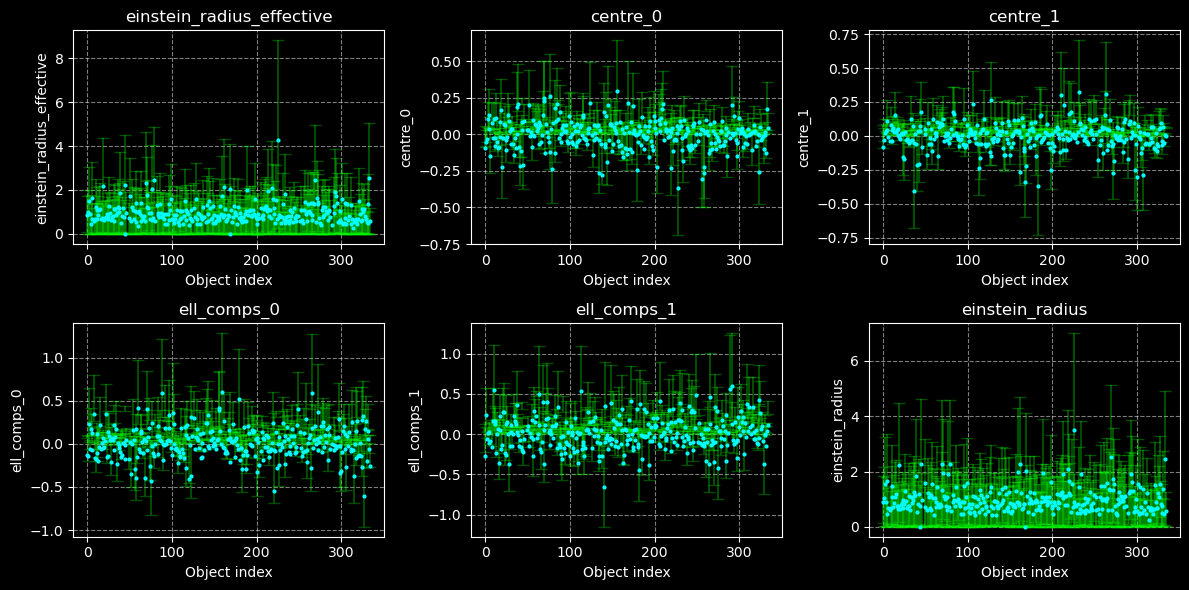

In [7]:
#Parameter distributions with 3 sigma errors

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for ax, label in zip(axes, modeling_param):
    
    main = '_max_lh'
    low = '_lower_3_sigma'
    upp = '_upper_3_sigma'

    y = data[label+main].to_numpy()
    yerr_low = data[label+low].to_numpy()
    yerr_up  = data[label+upp].to_numpy() 

    x = np.arange(len(data))

    #ax.errorbar(x, y, yerr=[yerr_low, yerr_up], fmt='o', capsize=4, ecolor='tab:red')
    line, caplines, barlinecols = ax.errorbar(x, y, yerr=[yerr_low, yerr_up], fmt='o', ms=2, capsize=4,
                                color = '#00FFFF', ecolor='#00FF00')
    for barcol in barlinecols: barcol.set_alpha(0.3)
    for cap in caplines: cap.set_alpha(0.3)
    
    ax.set_title(label)
    ax.set_xlabel("Object index")
    ax.set_ylabel(label)
    ax.grid(which='both',  linestyle='--', alpha=0.5)
    
plt.tight_layout()
plt.show() 
plt.close()

## Sersic Light Deflector Parameters

In [8]:
filename = 'modeling_lens_sersic.csv'
data = pd.read_csv(filename)
print(len(data))
data = data[data['effective_radius_max_lh'] < 25] # Removing Nan values and one very out of the distribution point
print(len(data))
modeling_param = ['centre_0', 'centre_1', 'ell_comps_0', 'ell_comps_1', 'effective_radius', 'sersic_index']


print(data.columns)

335
321
Index(['Unnamed: 0', 'id_str', 'centre_0_max_lh', 'centre_0_median_pdf',
       'centre_0_lower_3_sigma', 'centre_0_upper_3_sigma',
       'centre_0_lower_1_sigma', 'centre_0_upper_1_sigma', 'centre_1_max_lh',
       'centre_1_median_pdf', 'centre_1_lower_3_sigma',
       'centre_1_upper_3_sigma', 'centre_1_lower_1_sigma',
       'centre_1_upper_1_sigma', 'ell_comps_0_max_lh',
       'ell_comps_0_median_pdf', 'ell_comps_0_lower_3_sigma',
       'ell_comps_0_upper_3_sigma', 'ell_comps_0_lower_1_sigma',
       'ell_comps_0_upper_1_sigma', 'ell_comps_1_max_lh',
       'ell_comps_1_median_pdf', 'ell_comps_1_lower_3_sigma',
       'ell_comps_1_upper_3_sigma', 'ell_comps_1_lower_1_sigma',
       'ell_comps_1_upper_1_sigma', 'effective_radius_max_lh',
       'effective_radius_median_pdf', 'effective_radius_lower_3_sigma',
       'effective_radius_upper_3_sigma', 'effective_radius_lower_1_sigma',
       'effective_radius_upper_1_sigma', 'sersic_index_max_lh',
       'sersic_index_media

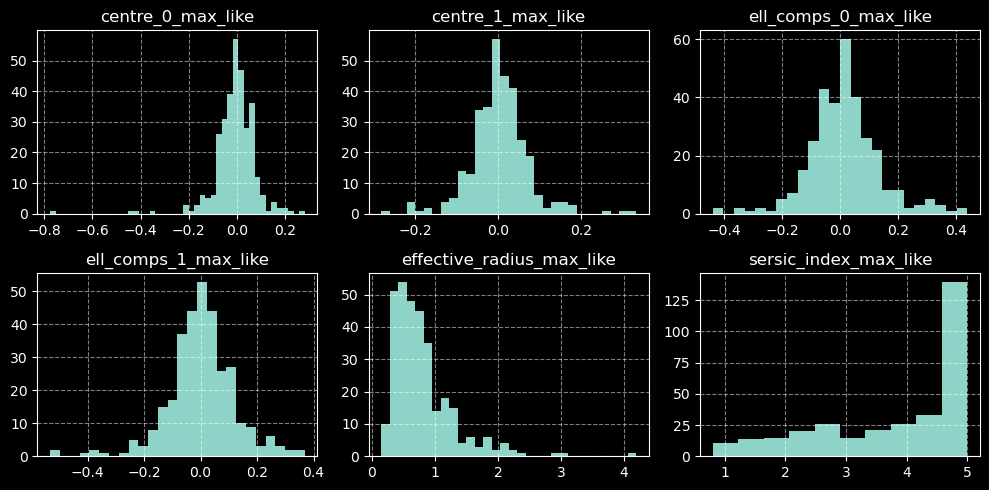

In [9]:
# Max likelihood parameters
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for ax, (label) in zip(axes, modeling_param):
    ax.hist(data[label + '_max_lh'], bins='auto')
    ax.set_title(label + '_max_like')
    ax.grid(which='both',  linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
plt.close()

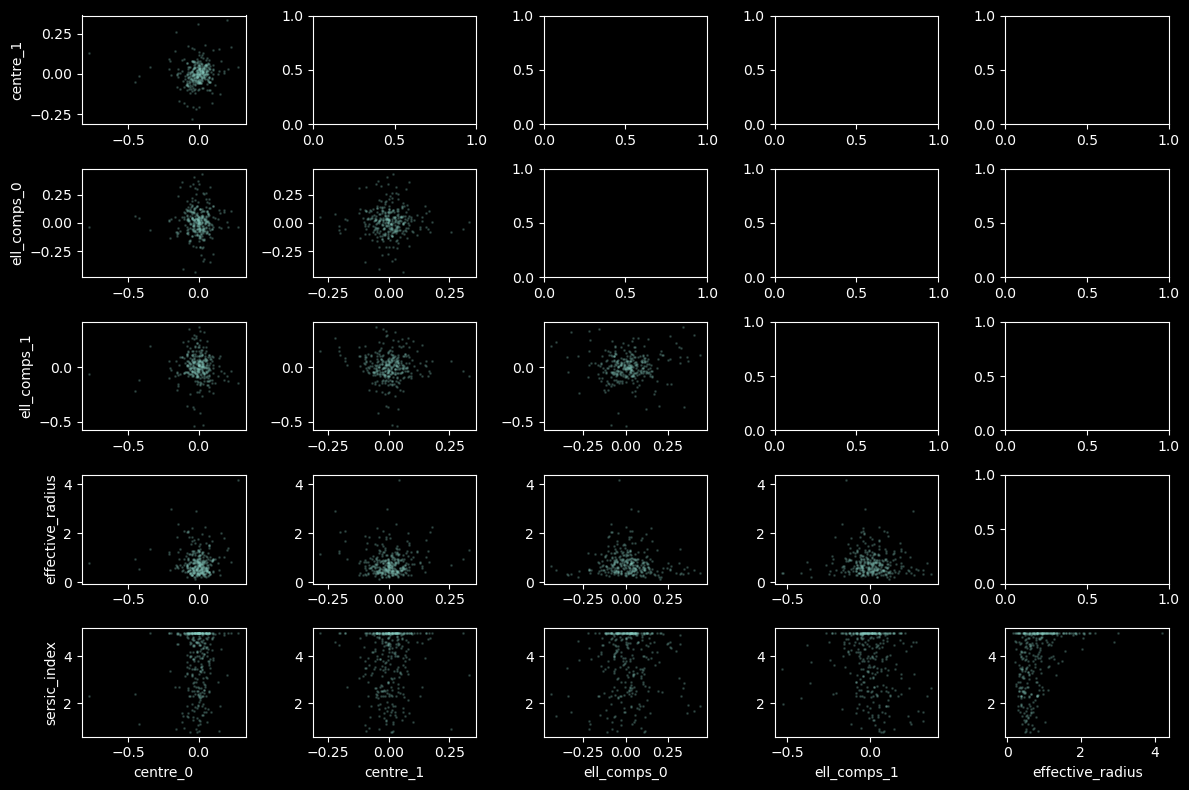

In [10]:
# Corner plots for Max likelihood parameters

fig, axes = plt.subplots(5, 5, figsize=(12, 8))

n = 0
for i in range(len(modeling_param)):
    for j in range(i+1, len(modeling_param)):
        ax = axes[j-1, i]
        ax.plot(data[modeling_param[i] + '_max_lh' ], data[modeling_param[j] + '_max_lh'], 'o', ms=1, alpha=0.2)
        if(i == 0):
            ax.set_ylabel(modeling_param[j])
        if(j == len(modeling_param)-1):
            ax.set_xlabel(modeling_param[i])
        n += 1

plt.tight_layout()
plt.show()
plt.close()

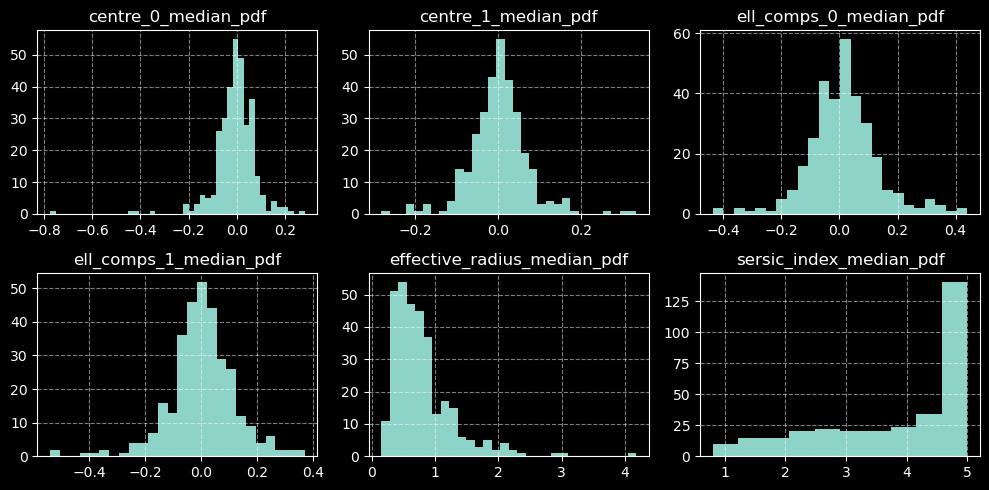

In [11]:
# Median parameter (from posterior)
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for ax, (label) in zip(axes, modeling_param):
    ax.hist(data[label + '_median_pdf'], bins='auto')
    ax.set_title(label + '_median_pdf')
    ax.grid(which='both',  linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
plt.close()

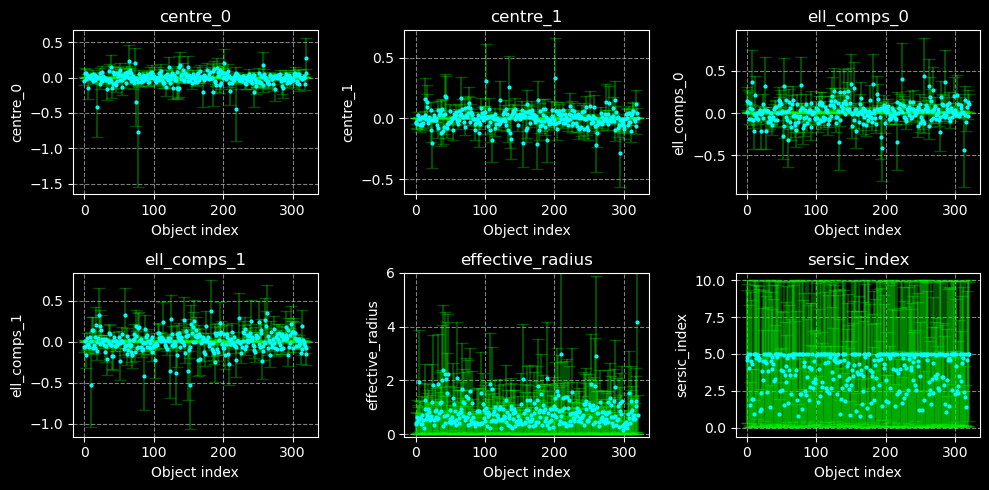

In [12]:
#Parameter distributions with 1 sigma errors

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for ax, label in zip(axes, modeling_param):
    
    main = '_max_lh'
    low = '_lower_1_sigma'
    upp = '_upper_1_sigma'

    y = data[label+main].to_numpy()
    yerr_low = data[label+low].to_numpy()
    yerr_up  = data[label+upp].to_numpy() 

    x = np.arange(len(data))

    #ax.errorbar(x, y, yerr=[yerr_low, yerr_up], fmt='o', ms=2, capsize=4, ecolor='tab:red')
    line, caplines, barlinecols = ax.errorbar(x, y, yerr=[yerr_low, yerr_up], fmt='o', ms=2, capsize=4,
                                color = '#00FFFF', ecolor='#00FF00')
    for barcol in barlinecols: barcol.set_alpha(0.3)
    for cap in caplines: cap.set_alpha(0.3)
    
    ax.set_title(label)
    ax.set_xlabel("Object index")
    ax.set_ylabel(label)
    ax.grid(which='both',  linestyle='--', alpha=0.5)
    if(label == 'effective_radius'): ax.set_ylim(-0.1, 6)
    
plt.tight_layout()
plt.show() 
plt.close()

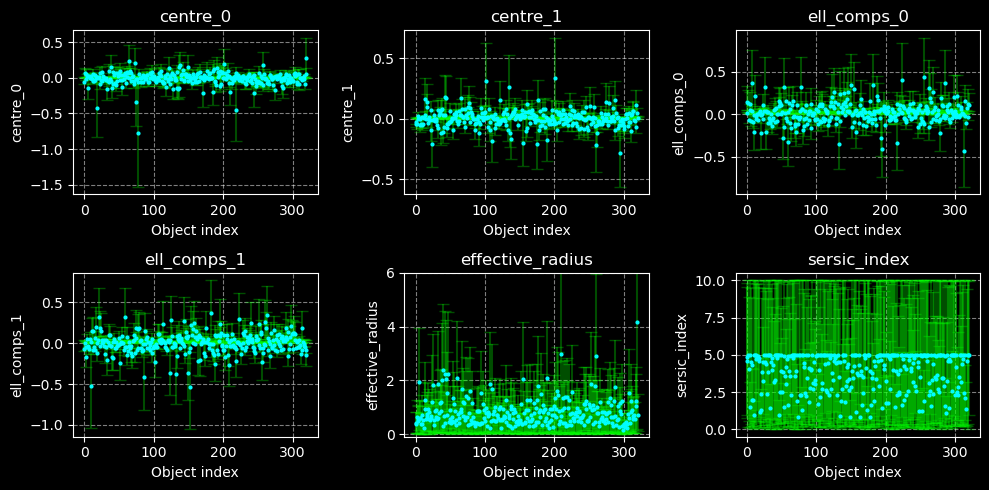

In [13]:
#Parameter distributions with 3 sigma errors

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for ax, label in zip(axes, modeling_param):
    
    main = '_max_lh'
    low = '_lower_3_sigma'
    upp = '_upper_3_sigma'

    y = data[label+main].to_numpy()
    yerr_low = data[label+low].to_numpy()
    yerr_up  = data[label+upp].to_numpy() 

    x = np.arange(len(data))

    #ax.errorbar(x, y, yerr=[yerr_low, yerr_up], fmt='o', capsize=4, ecolor='tab:red')
    line, caplines, barlinecols = ax.errorbar(x, y, yerr=[yerr_low, yerr_up], fmt='o', ms=2, capsize=4,
                                color = '#00FFFF', ecolor='#00FF00')
    for barcol in barlinecols: barcol.set_alpha(0.3)
    for cap in caplines: cap.set_alpha(0.3)
    
    ax.set_title(label)
    ax.set_xlabel("Object index")
    ax.set_ylabel(label)
    ax.grid(which='both',  linestyle='--', alpha=0.5)
    if(label == 'effective_radius'): ax.set_ylim(-0.1, 6)
    
plt.tight_layout()
plt.show() 
plt.close()

## Magnitudes of the deflector and source galaxies. These are measured quantities

In [14]:
filename = 'modeling_sersic_magnitude.csv'
data = pd.read_csv(filename)
modeling_param = ['centre_0', 'centre_1', 'ell_comps_0', 'ell_comps_1', 'effective_radius', 'sersic_index']

data.columns

print(data.columns)

Index(['Unnamed: 0', 'id_str', 'vis_total_lens_flux_max_lh',
       'vis_total_lens_flux_median_pdf', 'vis_total_lens_flux_lower_1_sigma',
       'vis_total_lens_flux_upper_1_sigma', 'vis_lens_magnitude_ab_max_lh',
       'vis_lens_magnitude_ab_median_pdf',
       'vis_lens_magnitude_ab_lower_1_sigma',
       'vis_lens_magnitude_ab_upper_1_sigma',
       'vis_lens_magnitude_ab_lower_3_sigma',
       'vis_lens_magnitude_ab_upper_3_sigma',
       'vis_total_lens_flux_lower_3_sigma',
       'vis_total_lens_flux_upper_3_sigma', 'nir_y_total_lens_flux_max_lh',
       'nir_y_total_lens_flux_median_pdf',
       'nir_y_total_lens_flux_lower_1_sigma',
       'nir_y_total_lens_flux_upper_1_sigma', 'nir_y_lens_magnitude_ab_max_lh',
       'nir_y_lens_magnitude_ab_median_pdf',
       'nir_y_lens_magnitude_ab_lower_1_sigma',
       'nir_y_lens_magnitude_ab_upper_1_sigma',
       'nir_y_lens_magnitude_ab_lower_3_sigma',
       'nir_y_lens_magnitude_ab_upper_3_sigma',
       'nir_y_total_lens_flux_lo